In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from math import exp, log10
sns.set()
# Scipy Optimization Algorithm is used to find the optimal parameters
import scipy.optimize as opt
from IPython.display import Image, display

In [51]:
#Load The Data as Pandas DataFrame
data=pd.read_csv('ex2data1.txt', sep=',',names = ["Mark_1", "Mark_2", "Pass"])

In [52]:
#Detect missing values (NaN in numeric arrays, None/NaN in object arrays)
data.isnull().sum()

Mark_1    0
Mark_2    0
Pass      0
dtype: int64

In [53]:
#Count the number of cases (rows)
data.notnull().count()

Mark_1    100
Mark_2    100
Pass      100
dtype: int64

## What should be done in this exercise
Suppose that you are the administrator of a university department and
you want to determine each applicant's chance of admission based on their
results on two exams. You have historical data from previous applicants
that you can use as a training set for logistic regression. For each training
example, you have the applicant's scores on two exams and the admissions
decision.
Your task is to build a classication model that estimates an applicant's
probability of admission based the scores from those two exams. This outline
and the framework code in ex2.m will guide you through the exercise.

In [54]:
X1=np.array(data['Mark_1'])
X2=np.array(data['Mark_2'])
X0 = np.array(np.ones(len(X1)))
Y=np.array(data['Pass'])
print(X1.shape == Y.shape and X2.shape == Y.shape)
l=len(X1)
#Construct a feature matrix X
X = np.array([np.ones(l),X1,X2]).T

True


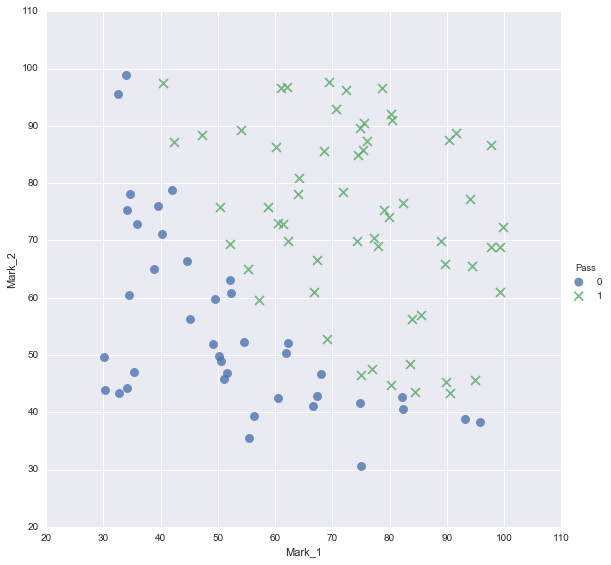

In [55]:
# Visualize the Data
sns.lmplot(x='Mark_1', y='Mark_2', hue='Pass', data=data, fit_reg=False, markers=["o", "x"], size=8, scatter_kws={"s": 80})

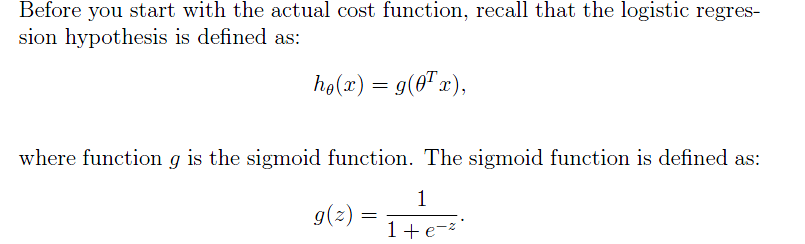

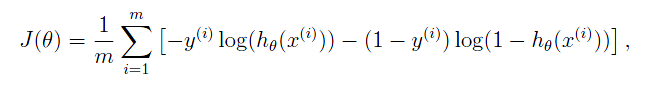

In [56]:
display(Image(filename='LogReg1.PNG', embed=True, width=500))
display(Image(filename='LogReg2.PNG', embed=True, width=500))

In [57]:
# Cost Function
def cost(T,X,Y):
    k=np.matmul(X,T)
    g=1/(1+np.exp(-k))
    c = (np.multiply(-Y,np.log(g)) - np.multiply((1-Y),np.log(1-g)))
    c=(c.sum())/l
    return (c)  

In [58]:
#Gradient Function, V - vector of X for calculation
def grad(T,X,Y):
    k=np.matmul(X,T)
    g=1/(1+np.exp(-k))
    error = g-Y
    g = np.matmul(error,X)/len(Y)
    return g

In [59]:
#Input a minimize parameters
alpha = 0.01
n = 1000 #number of steps for minimalization
T = np.array([0,0,0])

### Gradient Descent Method

In [60]:
T = np.array([0,0,0])
c=[]
for i in range(n):
    cos=cost(T,X,Y)
    c.append(cos)
    a=grad(T,X,Y)
    T = T-(alpha)*a
T

array([-0.76754116,  0.35868899, -0.11012487])

#### two different algorithm for minimum search are used to compare 
1 - cost(result[0], X, Y)

2 - opt.fmin_l_bfgs_b

In [61]:
T=np.array([0,0,0])
result = opt.fmin_tnc(func=cost, x0=T, fprime=grad, args=(X, Y))  

In [62]:
cost(result[0], X, Y)

0.20349770158947467

In [63]:
result

(array([-25.16131858,   0.20623159,   0.20147149]), 36, 0)

In [64]:
result2=opt.fmin_l_bfgs_b(func=cost, x0=T, fprime=grad, args=(X, Y)) 

In [65]:
cost(result2[0], X, Y)

0.20349770159166281

In [66]:
result2

(array([-25.16141038,   0.20623233,   0.20147212]),
 0.20349770159166281,
 {'funcalls': 33,
  'grad': array([ -4.17352669e-07,  -2.32115689e-05,  -2.58099089e-05]),
  'nit': 27,
  'task': b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH',
  'warnflag': 0})

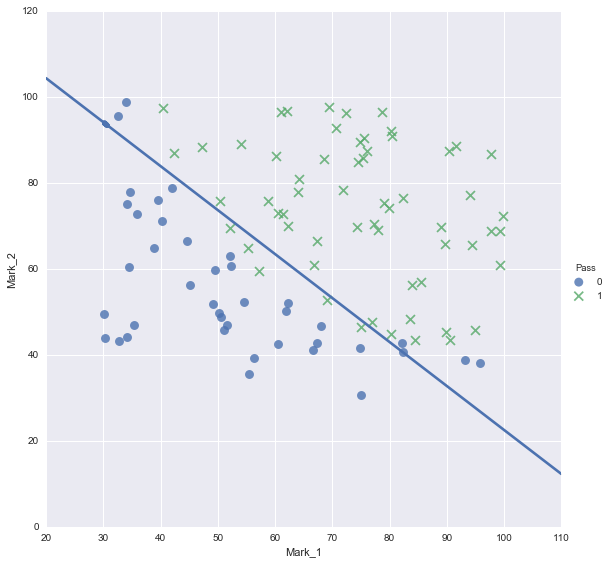

In [67]:
# Visualize the Data
res=result[0]
sns.lmplot(x='Mark_1', y='Mark_2', hue='Pass', data=data, fit_reg=False, markers=["o", "x"], size=8, scatter_kws={"s": 80})
plt.plot()
a=np.linspace(X1.min(),X2.min())
sns.regplot(x=a, y=(-res[0]-a*res[1])/res[2])

In [68]:
# Check the prediction accuracy
def accuracy(t,X,Y):
    d = np.matmul(X,t)
    b=(d>=0)
    c=(d<0)
    d[b]=1
    d[c]=0
    accur=(len(Y)-(np.absolute(d-Y)).sum())/len(Y)
    return accur

In [69]:
accuracy(res,X,Y)

0.89000000000000001

## Regularized logistic regression
In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assur-
ance (QA). During QA, each microchip goes through various tests to ensure
it is functioning correctly.
Suppose you are the product manager of the factory and you have the
test results for some microchips on two dierent tests. From these two tests,
you would like to determine whether the microchips should be accepted or
rejected. To help you make the decision, you have a dataset of test results
on past microchips, from which you can build a logistic regression model.

In [70]:
data=pd.read_csv('ex2data2.txt', sep=',',names = ["Test_1", "Test_2", "Pass"])

In [71]:
X1=np.array(data['Test_1'])
X2=np.array(data['Test_2'])
X0 = np.array(np.ones(len(X1)))
Y=np.array(data['Pass'])
print(X1.shape == Y.shape and X2.shape == Y.shape)
l=len(X1)
#Construct a feature matrix X
X = np.array([np.ones(l),X1,X2]).T

True


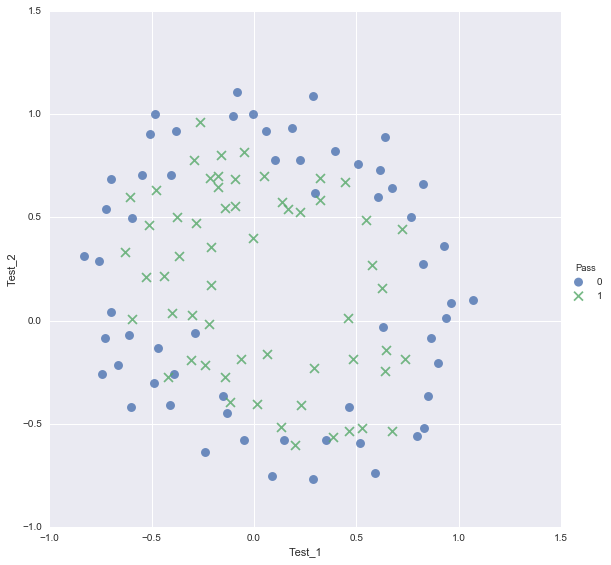

In [72]:
#Visualize the Data
sns.lmplot(x='Test_1', y='Test_2', hue='Pass', data=data, fit_reg=False, markers=["o", "x"], size=8, scatter_kws={"s": 80})

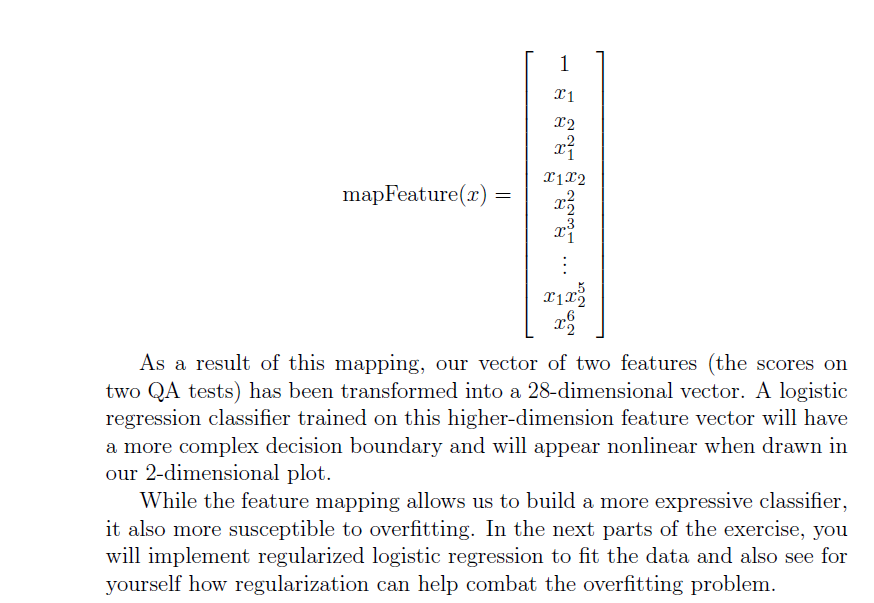

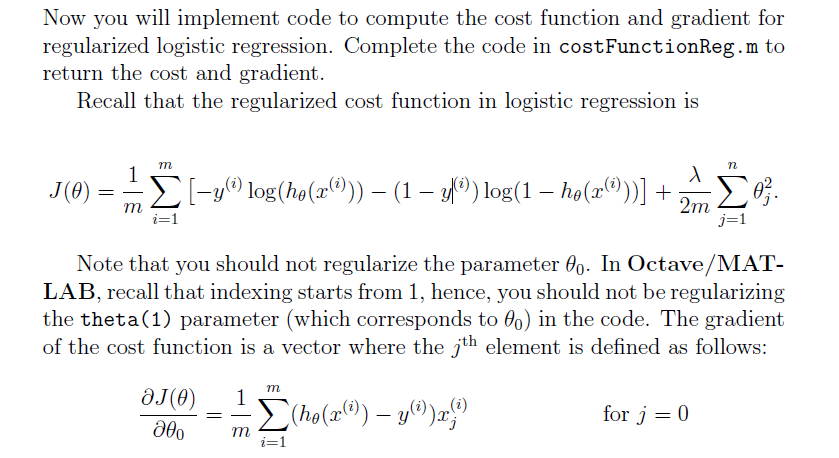

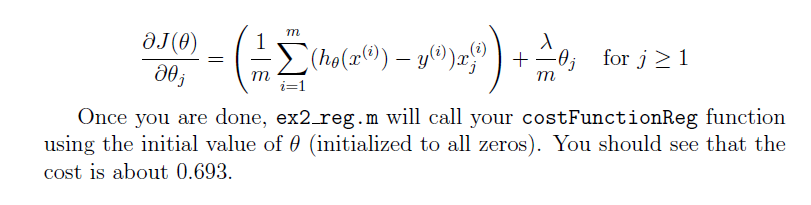

In [73]:
display(Image(filename='LogReg3.PNG', embed=True, width=500))
display(Image(filename='LogReg4.PNG', embed=True, width=500))
display(Image(filename='LogReg5.PNG', embed=True, width=400))

In [74]:
# Cost Function for Regularization
LearningRate=0
def cost_reg(T,X,Y,LearningRate):
    k=np.matmul(X,T)
    g=1/(1+np.exp(-k))
    c = (np.multiply(-Y,np.log(g)) - np.multiply((1-Y),np.log(1-g)))
    c=(c.sum())/l
    
    #Regularization parameter
    c_reg=(T**2).sum()
    c_reg=c_reg*(LearningRate/(2*len(Y)))
    
    cost_regul = c+c_reg
    return (cost_regul) 

In [75]:
#Gradient Function, with Regularization
def grad_reg(T,X,Y,LearningRate):
    k=np.matmul(X,T)
    g=1/(1+np.exp(-k))
    error = g-Y
    g = np.matmul(error,X)/(len(Y))
    
    #Regularization part
    g_reg=LearningRate/len(Y)*(T)
    g_reg[0]=0
    
    grad_regul = g + g_reg
    return grad_regul

In [76]:
#Construct the features matrix, also the Sckit learn has a function for this
n=6   #polinomial degree
def feature(X,n):
    feat=X[:,0]
    for i in range (n+1):
        for j in range (n+1-i):
            new_col=((X[:,1])**i)*(X[:,2]**j)
            feat=np.column_stack((feat,new_col))
    feat=feat[:,1:]
    return feat
feat=feature(X,n)
T=np.zeros(len(feat[0,:]))

In [77]:
# Use opt.fmin_tnc optimization method
result = opt.fmin_tnc(func=cost_reg, x0=T, fprime=grad_reg, args=(feat, Y, LearningRate))
print('Cost Function = ',cost_reg(result[0],feat,Y, LearningRate))
print('Accuracy = ',accuracy(result[0],feat,Y))

Cost Function =  0.258459910462
Accuracy =  0.85593220339


In [78]:
# Use opt.fmin_tnc optimization method
theta, theta_i = opt.fmin_bfgs(cost_reg,x0=T,fprime=grad_reg,args=(feat, Y, LearningRate),retall = 1, disp = 0)
print('Cost Function = ',cost_reg(theta,feat,Y, LearningRate))
print('Accuracy = ',accuracy(theta,feat,Y))

Cost Function =  0.224568727774
Accuracy =  0.915254237288


In [79]:
# Use opt.minimize optimization method. Gradient is not required here. Result is result.x.
result = opt.minimize(cost_reg, T, args=(feat, Y, LearningRate),  method='BFGS', options={"maxiter":500, "disp":False})

print('Cost Function = ',cost_reg(result.x,feat,Y, LearningRate))
print('Accuracy = ',accuracy(result.x,feat,Y))

Cost Function =  0.244587290908
Accuracy =  0.889830508475


In [80]:
def draw_func():
    xvals = np.linspace(X1.min(),X1.max(),50)
    yvals = np.linspace((X2.min(),X2.max(),50))
    x,y = np.meshgrid(xvals,yvals)


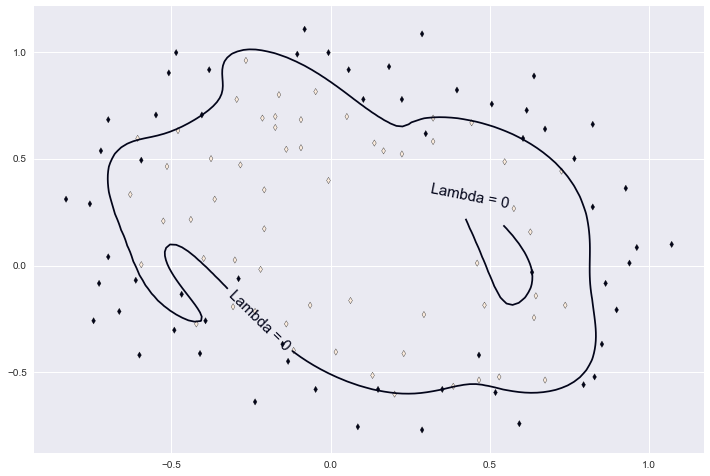

In [81]:
def draw_func(X1,X2,theta):
    xvals = np.linspace(X1.min(),X1.max(),100)
    yvals = np.linspace(X2.min(),X2.max(),100)
    x,y = np.meshgrid(xvals,yvals)
    z=np.array([np.zeros(len(xvals))])
    z=z.reshape(-1,1)
    for i in range (len(xvals)):
        c = np.array([np.ones(len(xvals)),x[:,i],y[:,i]])
        c = c.T  
        c=feature(c,6)
        new_col=np.matmul(c,theta)
        z = np.column_stack((z, new_col))    
    z=z[:,1:]

    fig, ax = plt.subplots(figsize=(12,8))
    mycontour = plt.contour( xvals, yvals, z, [0])
    myfmt = { 0:'Lambda = %d'%LearningRate}
    ax.clabel(mycontour, inline=1, fontsize=15, fmt=myfmt)
    #ax.title("Decision Boundary")
    ax = plt.scatter(x=data['Test_1'],y=data['Test_2'],c=data['Pass'], marker=('d'))  
    
draw_func(X1,X2,theta)